In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
df = pd.read_csv('/root/Desktop/turkiye-student-evaluation_generic.csv')

In [3]:
df.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [4]:
df.tail()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
5815,3,13,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5816,3,13,1,3,4,4,4,4,4,4,...,5,5,5,5,4,5,5,5,5,5
5817,3,13,1,0,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
5818,3,13,1,1,2,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5819,3,13,1,1,2,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [5]:
df.describe()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
count,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,...,5820.000000,5820.000000,5820.000000,5820.000000,5820.00000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000
mean,2.485567,7.276289,1.214089,1.675601,2.783505,2.929897,3.073883,3.178694,3.082474,3.105842,...,3.261684,3.285395,3.307388,3.317526,3.20189,3.166838,3.312543,3.222165,3.154811,3.308076
std,0.718473,3.688175,0.532376,1.474975,1.348987,1.341077,1.285251,1.253567,1.284594,1.278989,...,1.268442,1.276848,1.269974,1.268358,1.27259,1.275909,1.257286,1.270695,1.291872,1.278709
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,4.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,2.00000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,3.000000,7.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,10.000000,1.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000
max,3.000000,13.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


In [6]:
df.isnull()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5815,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5816,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5817,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5818,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
df.corr()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
instr,1.000000,-0.039871,0.112763,-0.107231,-0.058368,-0.128931,-0.127070,-0.108949,-0.113222,-0.135606,...,-0.112485,-0.086831,-0.078101,-0.080586,-0.118889,-0.128880,-0.083563,-0.103499,-0.107664,-0.081672
class,-0.039871,1.000000,0.091527,-0.016312,-0.044899,-0.029542,-0.033274,-0.021534,-0.030165,-0.036584,...,-0.018727,-0.031234,-0.022758,-0.016553,-0.025983,-0.036712,-0.027816,-0.029491,-0.022576,-0.037364
nb.repeat,0.112763,0.091527,1.000000,-0.078086,0.110493,-0.024708,-0.041707,-0.035704,-0.033613,-0.031770,...,-0.045568,-0.042624,-0.046262,-0.045464,-0.041233,-0.033618,-0.049918,-0.035518,-0.032457,-0.044900
attendance,-0.107231,-0.016312,-0.078086,1.000000,0.436792,0.105266,0.149258,0.178393,0.138108,0.149747,...,0.190694,0.195166,0.204802,0.207740,0.177814,0.163546,0.204435,0.172695,0.144687,0.200150
difficulty,-0.058368,-0.044899,0.110493,0.436792,1.000000,0.052120,0.065031,0.071457,0.062171,0.064181,...,0.080017,0.091051,0.095628,0.099543,0.075317,0.072609,0.099682,0.064456,0.059370,0.090876
Q1,-0.128931,-0.029542,-0.024708,0.105266,0.052120,1.000000,0.866138,0.767381,0.849773,0.804757,...,0.699370,0.685299,0.673770,0.670702,0.728770,0.732167,0.672120,0.698924,0.709639,0.658873
Q2,-0.127070,-0.033274,-0.041707,0.149258,0.065031,0.866138,1.000000,0.850766,0.873556,0.861803,...,0.788643,0.778299,0.764986,0.766872,0.801172,0.797314,0.766622,0.778405,0.768125,0.752515
Q3,-0.108949,-0.021534,-0.035704,0.178393,0.071457,0.767381,0.850766,1.000000,0.826342,0.843329,...,0.799645,0.795384,0.791391,0.789747,0.799752,0.792241,0.793341,0.796296,0.765633,0.781299
Q4,-0.113222,-0.030165,-0.033613,0.138108,0.062171,0.849773,0.873556,0.826342,1.000000,0.867861,...,0.769526,0.759810,0.752171,0.748081,0.788852,0.789508,0.752370,0.766368,0.759536,0.742186
Q5,-0.135606,-0.036584,-0.031770,0.149747,0.064181,0.804757,0.861803,0.843329,0.867861,1.000000,...,0.809381,0.794833,0.780245,0.778777,0.831221,0.830279,0.782437,0.804916,0.791877,0.767411


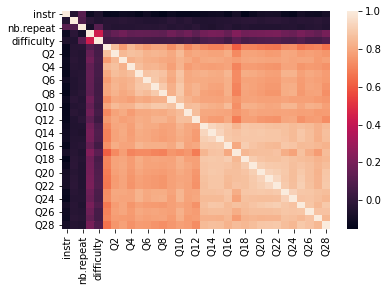

In [8]:
hm = df.corr()
sns.heatmap(hm)

In [9]:
df['nb.repeat'].value_counts()

1    4909
2     576
3     335
Name: nb.repeat, dtype: int64

In [10]:
df.difficulty.value_counts()

3    1774
1    1620
4    1225
5     652
2     549
Name: difficulty, dtype: int64

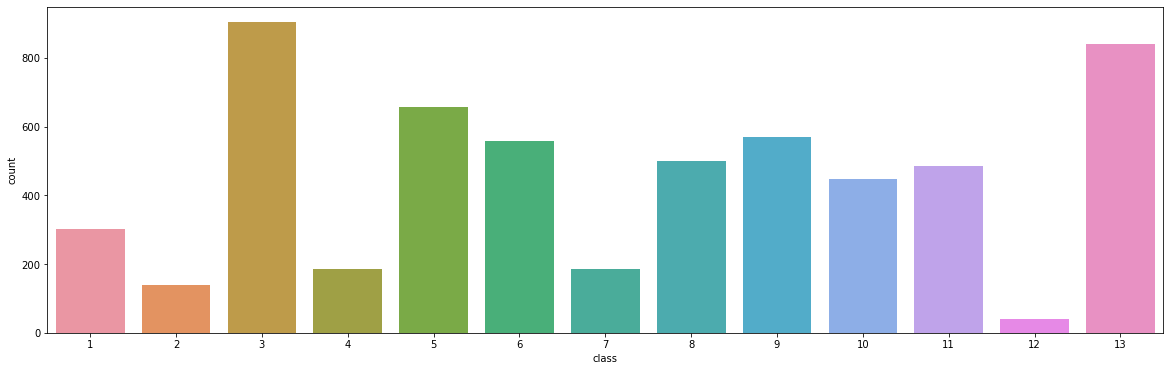

In [11]:
plt.figure(figsize=(20, 6))
sns.countplot(x = 'class',data = df)

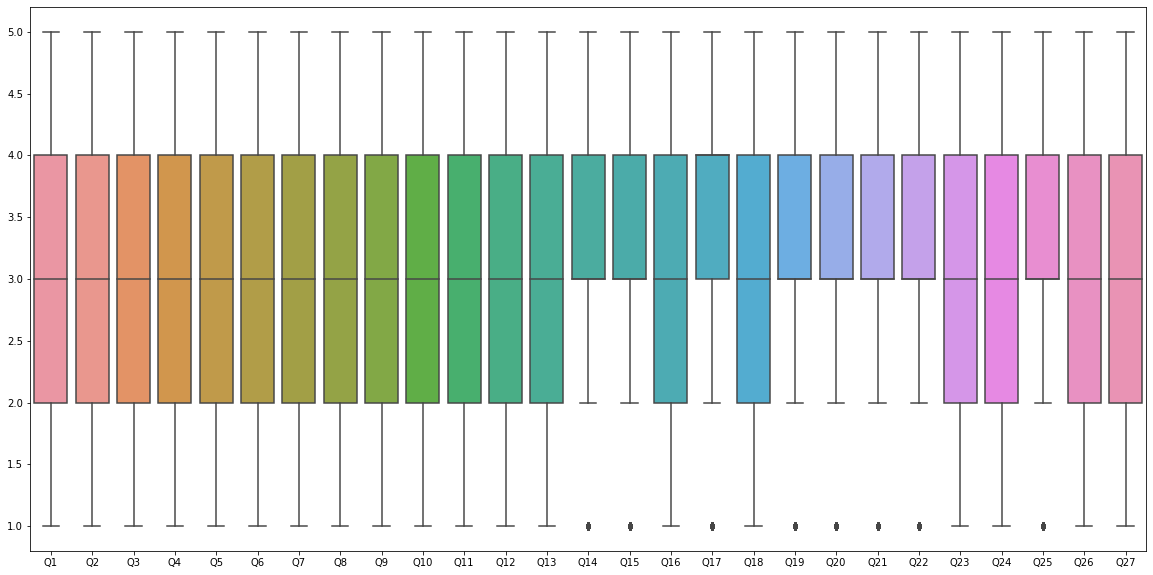

In [12]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df.iloc[:,5:32])

In [14]:
# CLUSTERRING DATA
X = question_df = df.iloc[:,5:33]

In [15]:
question_df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [16]:
pca = PCA(n_components=2)
PC = pca.fit_transform(question_df)

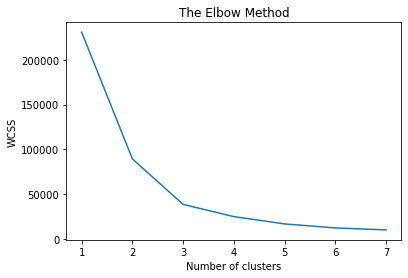

In [17]:
wcss = []
for i in range(1,8):
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(PC)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,8),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [18]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
y_kmeans = kmeans.fit_predict(PC)

In [19]:
y_kmeans

array([2, 2, 1, ..., 1, 0, 0], dtype=int32)

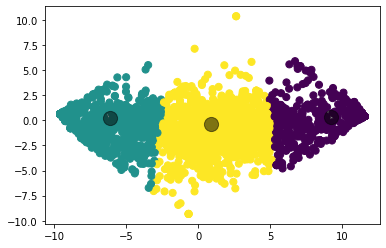

In [20]:
plt.scatter(PC[:, 0], PC[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

/usr/lib/python3/dist-packages/seaborn/distributions.py:437: UserWarning: The following kwargs were not used by contour: 'c', 's'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


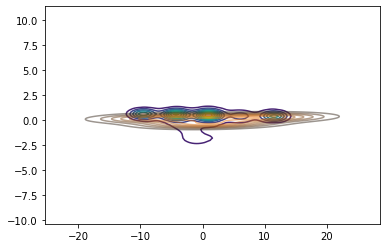

In [21]:
sns.kdeplot(PC[:, 0], PC[:, 1], c = y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
sns.kdeplot(centers[:, 0], centers[:, 1], c = 'black', s=200, alpha=0.5)